# Learning to Use Python Fast 

Using Python to see the data science **pipeline** in action

## sklearn.linear_model

***This module in scikit-learn contains various classes for linear models, including regression models.
LinearRegression class***

– To fit a linear regression model to data, use the LinearRegression class offered
by sklearn.linear_model.

– Modeling the relationship between a dependent variable and one or more independent variables using a linear technique is known as linear regression.

– In simple linear regression (as used in the example), there is only one independent variable. However, scikit-learn’s LinearRegression class can handle multiple independent variables as well (Multiple Linear Regression).

– Ordinary least squares (OLS) regression is implemented by the LinearRegression
class. It finds the best-fitting line (or hyperplane) through the data points by minimizing the sum of squared residuals.

– The predict() function can be used to create predictions once the model has been
trained using training data via the fit() method.

## 1. Loading data

The code places the entire dataset in the housing variable
and then places parts of that data in variables named X and y. Think of
variables as you would storage boxes. The variables are important
because they make it possible to work with the data.

In [15]:
from sklearn.datasets import fetch_california_housing

# Load the dataset
housing = fetch_california_housing()

# Split into features (X) and target (y)
X,y = housing.data,housing.target

# Check the shapes
print(f"Features shape: {X.shape}")  # Should be (20640, 8)
print(f"Target shape: {y.shape}")    # Should be (20640,)

# You can also see feature names
print(f"Feature names: {housing.feature_names}")
print(f"Target name: {housing.target_names}")

# Display first few rows of features
print("\nFirst 5 rows of features:")

print(X[:5])

# Display first few target values
print("\nFirst 5 target values:")
print(y[:5])

Features shape: (20640, 8)
Target shape: (20640,)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target name: ['MedHouseVal']

First 5 rows of features:
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]

First 5 target values:
[4.526 3.585 3.521 3.413 3.422]


### Or Using pandas

In [10]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
california = fetch_california_housing()

# Convert to DataFrame for easier viewing
df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


## 2. Training a model

Now that you have some data to work with, you can do something with
it. All sorts of algorithms are built into Python.

The important thing to note is that Python lets you perform the linear regression using
just two statements and to place the result in a variable named
hypothesis.

**1. hypothesis = LinearRegression():** The Blueprint
This line does two key things:

Importing the Algorithm: It relies on an earlier, unshown line (likely from sklearn.linear_model import LinearRegression) that makes the LinearRegression class available.

Creating an Instance: You are creating a specific instance of the Linear Regression algorithm, which you've named hypothesis. Think of LinearRegression as the blueprint for a model that finds the best straight line to fit your data. By creating hypothesis, you're building an empty model ready to be trained. In Scikit-learn, this instance is often called an Estimator.

**2. hypothesis.fit(X, y):** The Training Phase
This is where the magic of training happens!

The Goal: The .fit() method is what Scikit-learn uses to train an algorithm.

The Data:

X (Features/Inputs): This is the data your model will learn from. In the context of the California Housing data you were loading before, X represents the table of features (like median income, house age, number of rooms, etc.). It's the input.

y (Target/Output): This is the answer key the model uses to learn. In your case, it would be the PRICE column (the median house values). It's the output the model is trying to predict.

In [16]:
from sklearn.linear_model import LinearRegression

# Create model instance and fit
hypothesis = LinearRegression()
hypothesis.fit(X,y)

LinearRegression()

## 3. Viewing a result
Performing any sort of analysis doesn’t pay unless you obtain some
benefit from it in the form of a result. In this case,
you see the coefficient output from the linear regression analysis. Notice
that there is one coefficient for each of the dataset features.

**Coefficients** are the weights or parameters that a linear model learns during training. They represent the relationship between each feature and the target variable.

**In Simple Terms:**
Coefficients tell you how much the target variable changes when a feature increases by 1 unit, holding all other features constant.

**How to Interpret Coefficients:**
MedInc: 0.4367 → For each $1,000 increase in median income, house price increases by $436.70 (holding other factors constant)

HouseAge: 0.0094 → For each year increase in house age, price increases by $9.40

AveRooms: -0.1073 → For each additional room, price decreases by $107.30 (this might seem counterintuitive due to correlations with other features)

**Key Properties:**
Magnitude: Larger absolute value = stronger effect on target

***Sign:***

Positive = feature increase → target increase

Negative = feature increase → target decrease

Important Notes:
Coefficients assume all other features remain constant

They're sensitive to feature scaling - if features are on different scales, coefficients aren't directly comparable

In multiple regression, coefficients can be counterintuitive due to correlations between features

***In essence, coefficients are the "recipe" that your linear model learns to make predictions - they quantify how much each feature contributes to the final prediction.***

In [17]:
print(hypothesis.coef_)

[ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


### Correlation:
Correlation is a statistical measure that describes the strength and direction of the relationship between two variables.

Key Concepts:
1. What Correlation Measures:
Direction: Positive or negative relationship

Strength: How strong the relationship is (from -1 to +1)

2. Correlation Coefficient (r):
Range: -1 to +1

+1: Perfect positive correlation

-1: Perfect negative correlation

0: No correlation

### Calculate Correlation Matrix

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Calculate correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Specifically for target variable
print("\nCorrelation with PRICE (target variable):")
price_correlations = correlation_matrix['PRICE'].sort_values(ascending=False)
print(price_correlations)

Correlation Matrix:
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
PRICE       0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude     PRICE  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -

### Visualize Correlations

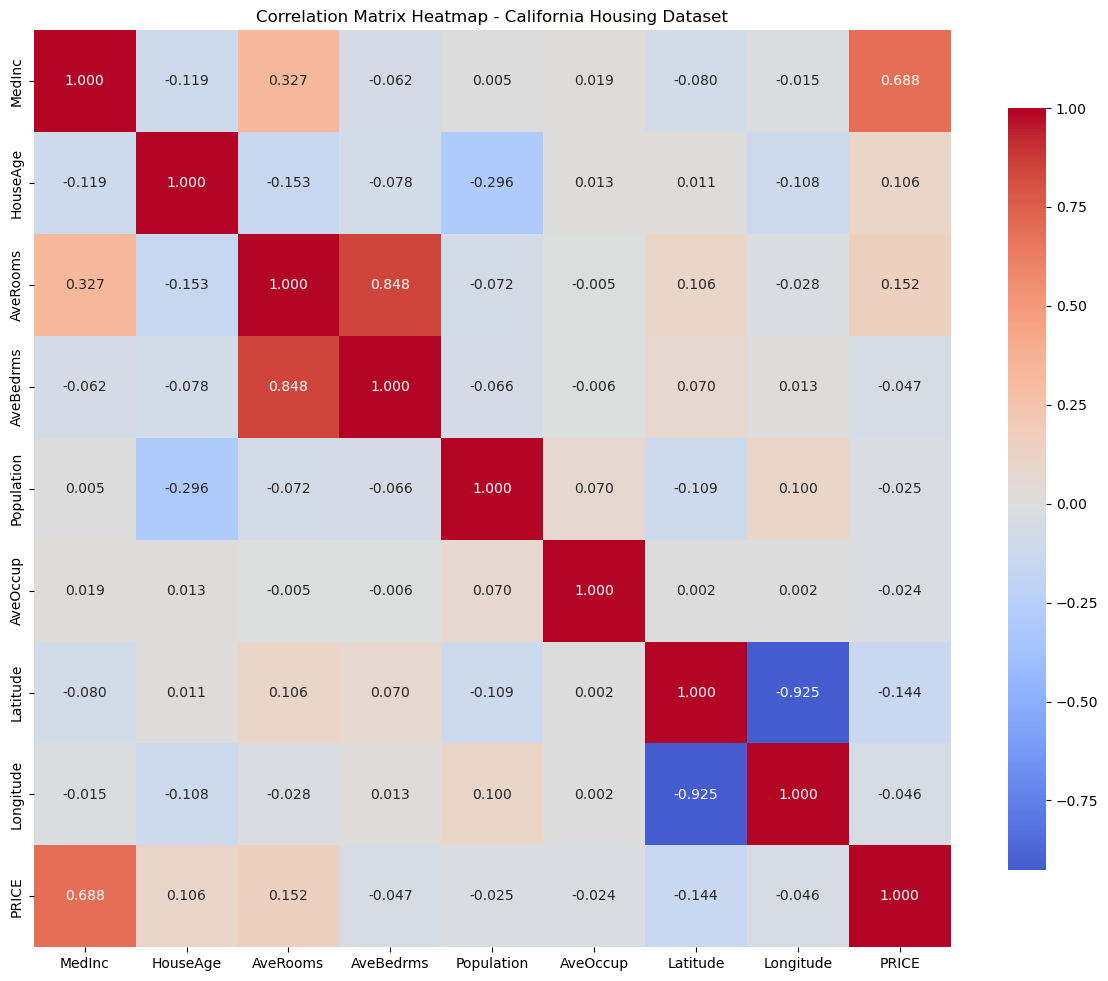

In [21]:
# Heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.3f',
            square=True,
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix Heatmap - California Housing Dataset')
plt.tight_layout()
plt.show()

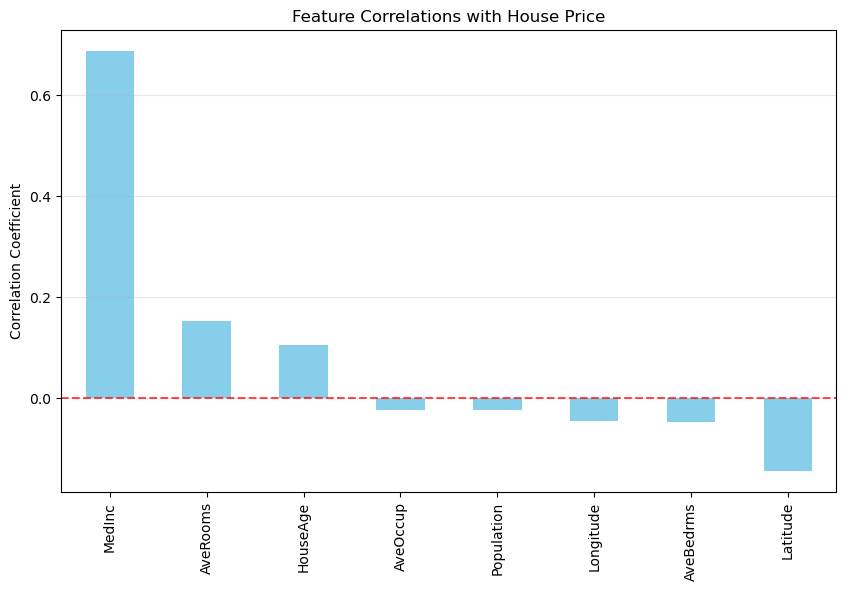

In [22]:
# Bar Plot of Correlations with Target

plt.figure(figsize=(10, 6))
price_correlations.drop('PRICE').plot(kind='bar', color='skyblue')
plt.title('Feature Correlations with House Price')
plt.ylabel('Correlation Coefficient')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.grid(axis='y', alpha=0.3)
plt.show()

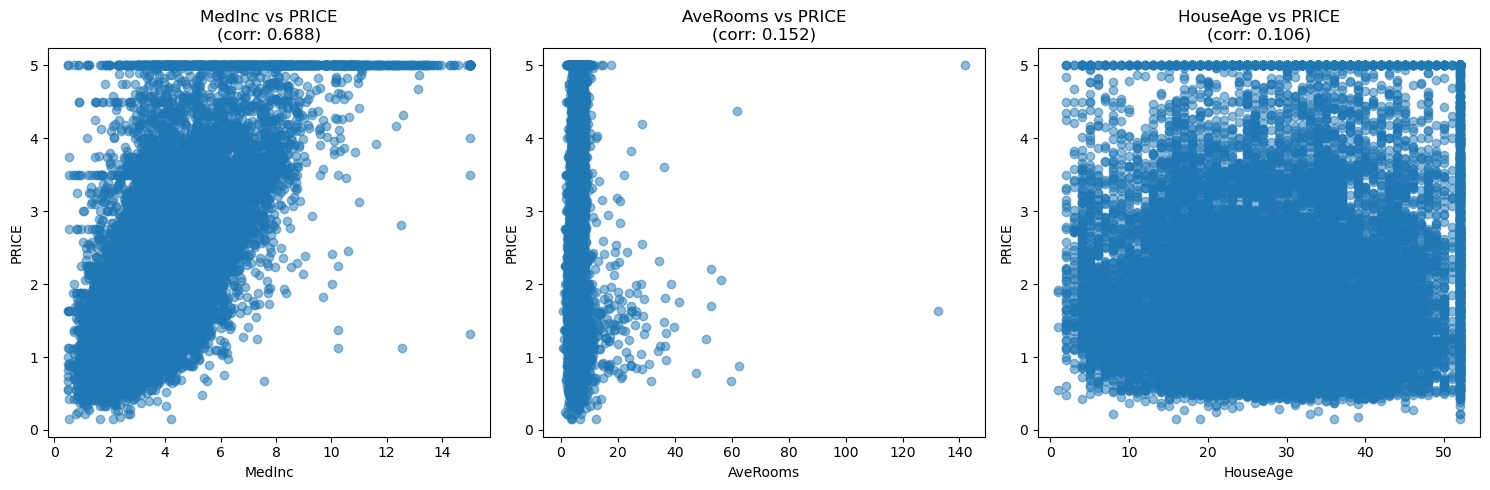

In [23]:
# Scatter Plots for Key Correlations

# Scatter plots for top correlated features
top_features = price_correlations.index[1:4]  # Top 3 features (excluding PRICE itself)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(top_features):
    axes[i].scatter(df[feature], df['PRICE'], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('PRICE')
    axes[i].set_title(f'{feature} vs PRICE\n(corr: {price_correlations[feature]:.3f})')
plt.tight_layout()
plt.show()

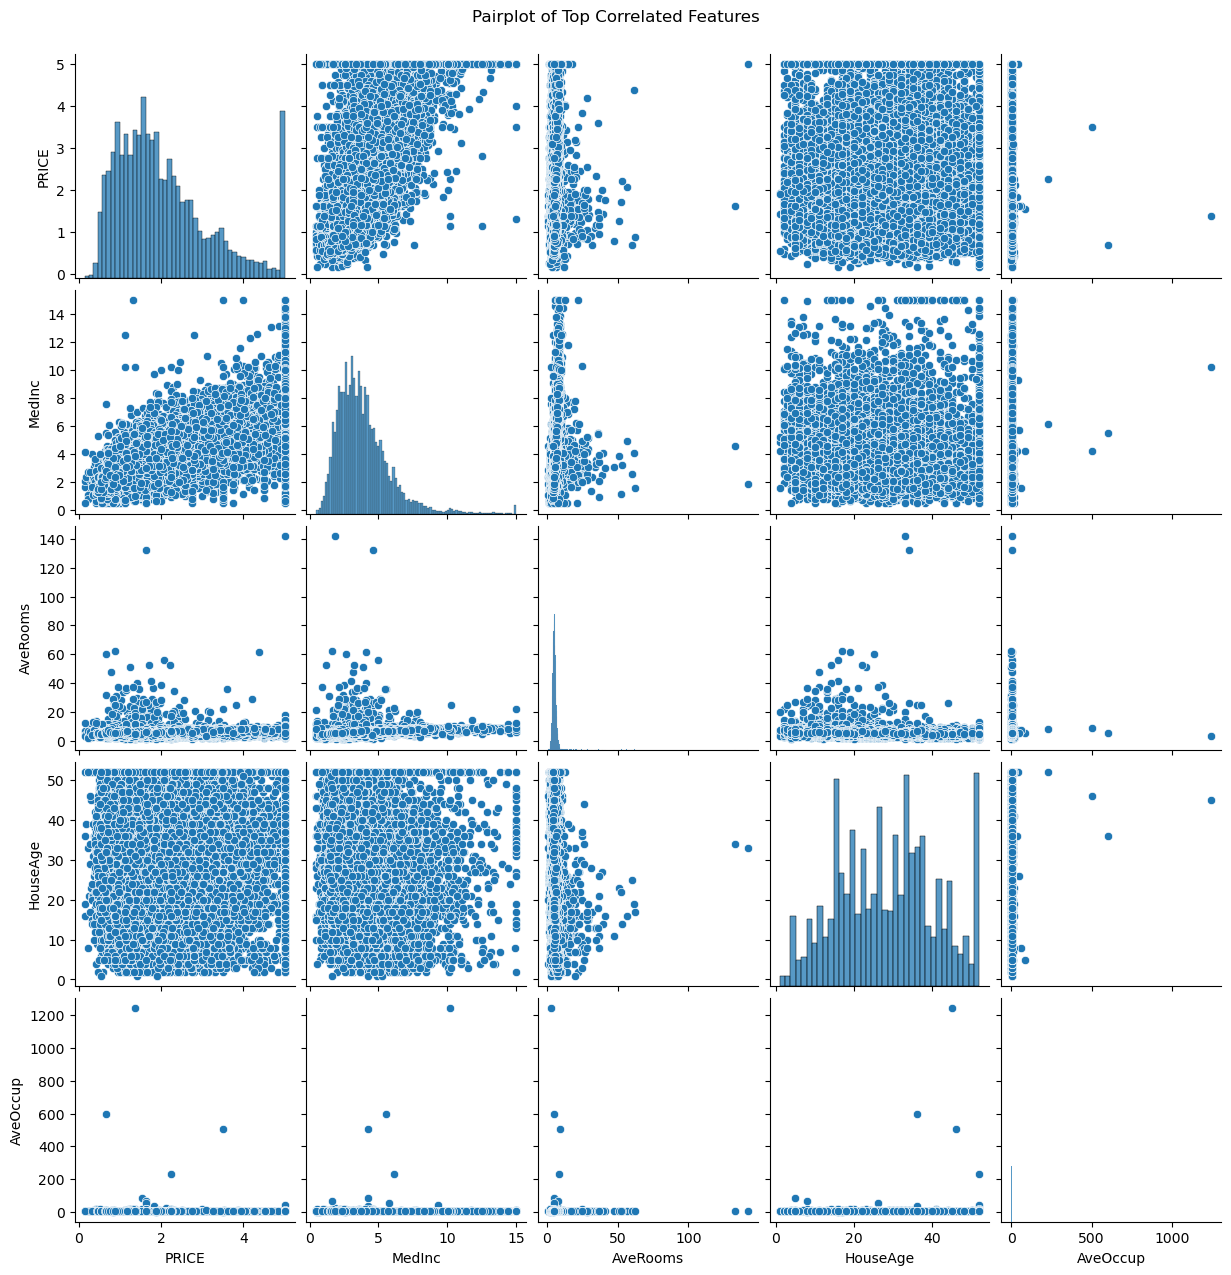

In [24]:
# Pairplot for Multiple Relationships

# Create pairplot for top correlated features
top_4_features = price_correlations.index[:5]  # Top 4 features including PRICE
sns.pairplot(df[top_4_features], diag_kind='hist')
plt.suptitle('Pairplot of Top Correlated Features', y=1.02)
plt.show()

In [26]:
 # Statistical Correlation Tests

from scipy.stats import pearsonr, spearmanr

# Pearson correlation test for top feature
top_feature = price_correlations.index[1]  # Most correlated feature after PRICE
pearson_corr, pearson_p = pearsonr(df[top_feature], df['PRICE'])
spearman_corr, spearman_p = spearmanr(df[top_feature], df['PRICE'])

print(f"\nStatistical Correlation Tests for {top_feature}:")
print(f"Pearson correlation: {pearson_corr:.4f} (p-value: {pearson_p:.2e})")
print(f"Spearman correlation: {spearman_corr:.4f} (p-value: {spearman_p:.2e})")


Statistical Correlation Tests for MedInc:
Pearson correlation: 0.6881 (p-value: 0.00e+00)
Spearman correlation: 0.6768 (p-value: 0.00e+00)


In [25]:
# Interpret the Results

print("=== CORRELATION INTERPRETATION ===")
print("Strong positive correlation (> 0.7):")
strong_pos = price_correlations[price_correlations > 0.7]
print(strong_pos)

print("\nModerate correlation (0.3 - 0.7):")
moderate = price_correlations[(price_correlations >= 0.3) & (price_correlations <= 0.7)]
print(moderate)

print("\nWeak correlation (0.1 - 0.3):")
weak = price_correlations[(price_correlations >= 0.1) & (price_correlations < 0.3)]
print(weak)

print("\nVery weak/no correlation (< 0.1):")
very_weak = price_correlations[price_correlations < 0.1]
print(very_weak)

=== CORRELATION INTERPRETATION ===
Strong positive correlation (> 0.7):
PRICE    1.0
Name: PRICE, dtype: float64

Moderate correlation (0.3 - 0.7):
MedInc    0.688075
Name: PRICE, dtype: float64

Weak correlation (0.1 - 0.3):
AveRooms    0.151948
HouseAge    0.105623
Name: PRICE, dtype: float64

Very weak/no correlation (< 0.1):
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: PRICE, dtype: float64


**Expected Insights from this Analysis:**

MedInc will likely have the strongest positive correlation with price

Latitude/Longitude might show interesting geographic patterns

Some features like AveBedrms might have weaker or unexpected correlations

You'll identify which features are most important for predicting house prices

This comprehensive correlation analysis will give you deep insights into the relationships within your dataset before building machine learning models!

